**如何在 sklearn 中使用 KNN**

在 Python 的 sklearn 工具包中有 KNN 算法。KNN 既可以做分类器，也可以做回归。如果是做分类，你需要引用：

```from sklearn.neighbors import KNeighborsClassifier```

如果是做回归，你需要引用：

```from sklearn.neighbors import KNeighborsRegressor```

从名字上你也能看出来 Classifier 对应的是分类，Regressor 对应的是回归。一般来说如果一个算法有 Classifier 类，都能找到相应的 Regressor 类。比如在决策树分类中，你可以使用 DecisionTreeClassifier，也可以使用决策树来做回归 DecisionTreeRegressor。

好了，我们看下如何在 sklearn 中创建 KNN 分类器。

这里，我们使用构造函数

``` KNeighborsClassifier(n_neighbors=5, weights=‘uniform’, algorithm=‘auto’, leaf_size=30)```

这里有几个比较主要的参数，我分别来讲解下：

1.n_neighbors：即 KNN 中的 K 值，代表的是邻居的数量。K 值如果比较小，会造成过拟合。如果 K 值比较大，无法将未知物体分类出来。一般我们使用默认值 5。

2.weights：是用来确定邻居的权重，有三种方式：

* weights=uniform，代表所有邻居的权重相同；
* weights=distance，代表权重是距离的倒数，即与距离成反比；
* 自定义函数，你可以自定义不同距离所对应的权重。大部分情况下不需要自己定义函数。

3.algorithm：用来规定计算邻居的方法，它有四种方式：

* algorithm=auto，根据数据的情况自动选择适合的算法，默认情况选择 auto；
* algorithm=kd_tree，也叫作 KD 树，是多维空间的数据结构，方便对关键数据进行检索，不过 KD 树适用于维度少的情况，一般维数不超过 20，如果维数大于 20 之后，效率反而会下降；
* algorithm=ball_tree，也叫作球树，它和 KD 树一样都是多维空间的数据结果，不同于 KD 树，球树更适用于维度大的情况；
* algorithm=brute，也叫作暴力搜索，它和 KD树不同的地方是在于采用的是线性扫描，而不是通过构造树结构进行快速检索。当训练集大的时候，效率很低。

4.leaf_size：代表构造 KD 树或球树时的叶子数，默认是 30，调整 leaf_size 会影响到树的构造和搜索速度。

创建完 KNN 分类器之后，我们就可以输入训练集对它进行训练，这里我们使用 fit() 函数，传入训练集中的样本特征矩阵和分类标识，会自动得到训练好的 KNN 分类器。然后可以使用 predict() 函数来对结果进行预测，这里传入测试集的特征矩阵，可以得到测试集的预测分类结果。

**如何用 KNN 对手写数字进行识别分类**

手写数字数据集是个非常有名的用于图像识别的数据集。数字识别的过程就是将这些图片与分类结果 0-9 一一对应起来。完整的手写数字数据集 MNIST 里面包括了 60000 个训练样本，以及 10000 个测试样本。如果你学习深度学习的话，MNIST 基本上是你接触的第一个数据集。

今天我们用 sklearn 自带的手写数字数据集做 KNN 分类，你可以把这个数据集理解成一个简版的 MNIST 数据集，它只包括了 1797 幅数字图像，每幅图像大小是 8*8 像素。

好了，我们先来规划下整个 KNN 分类的流程：

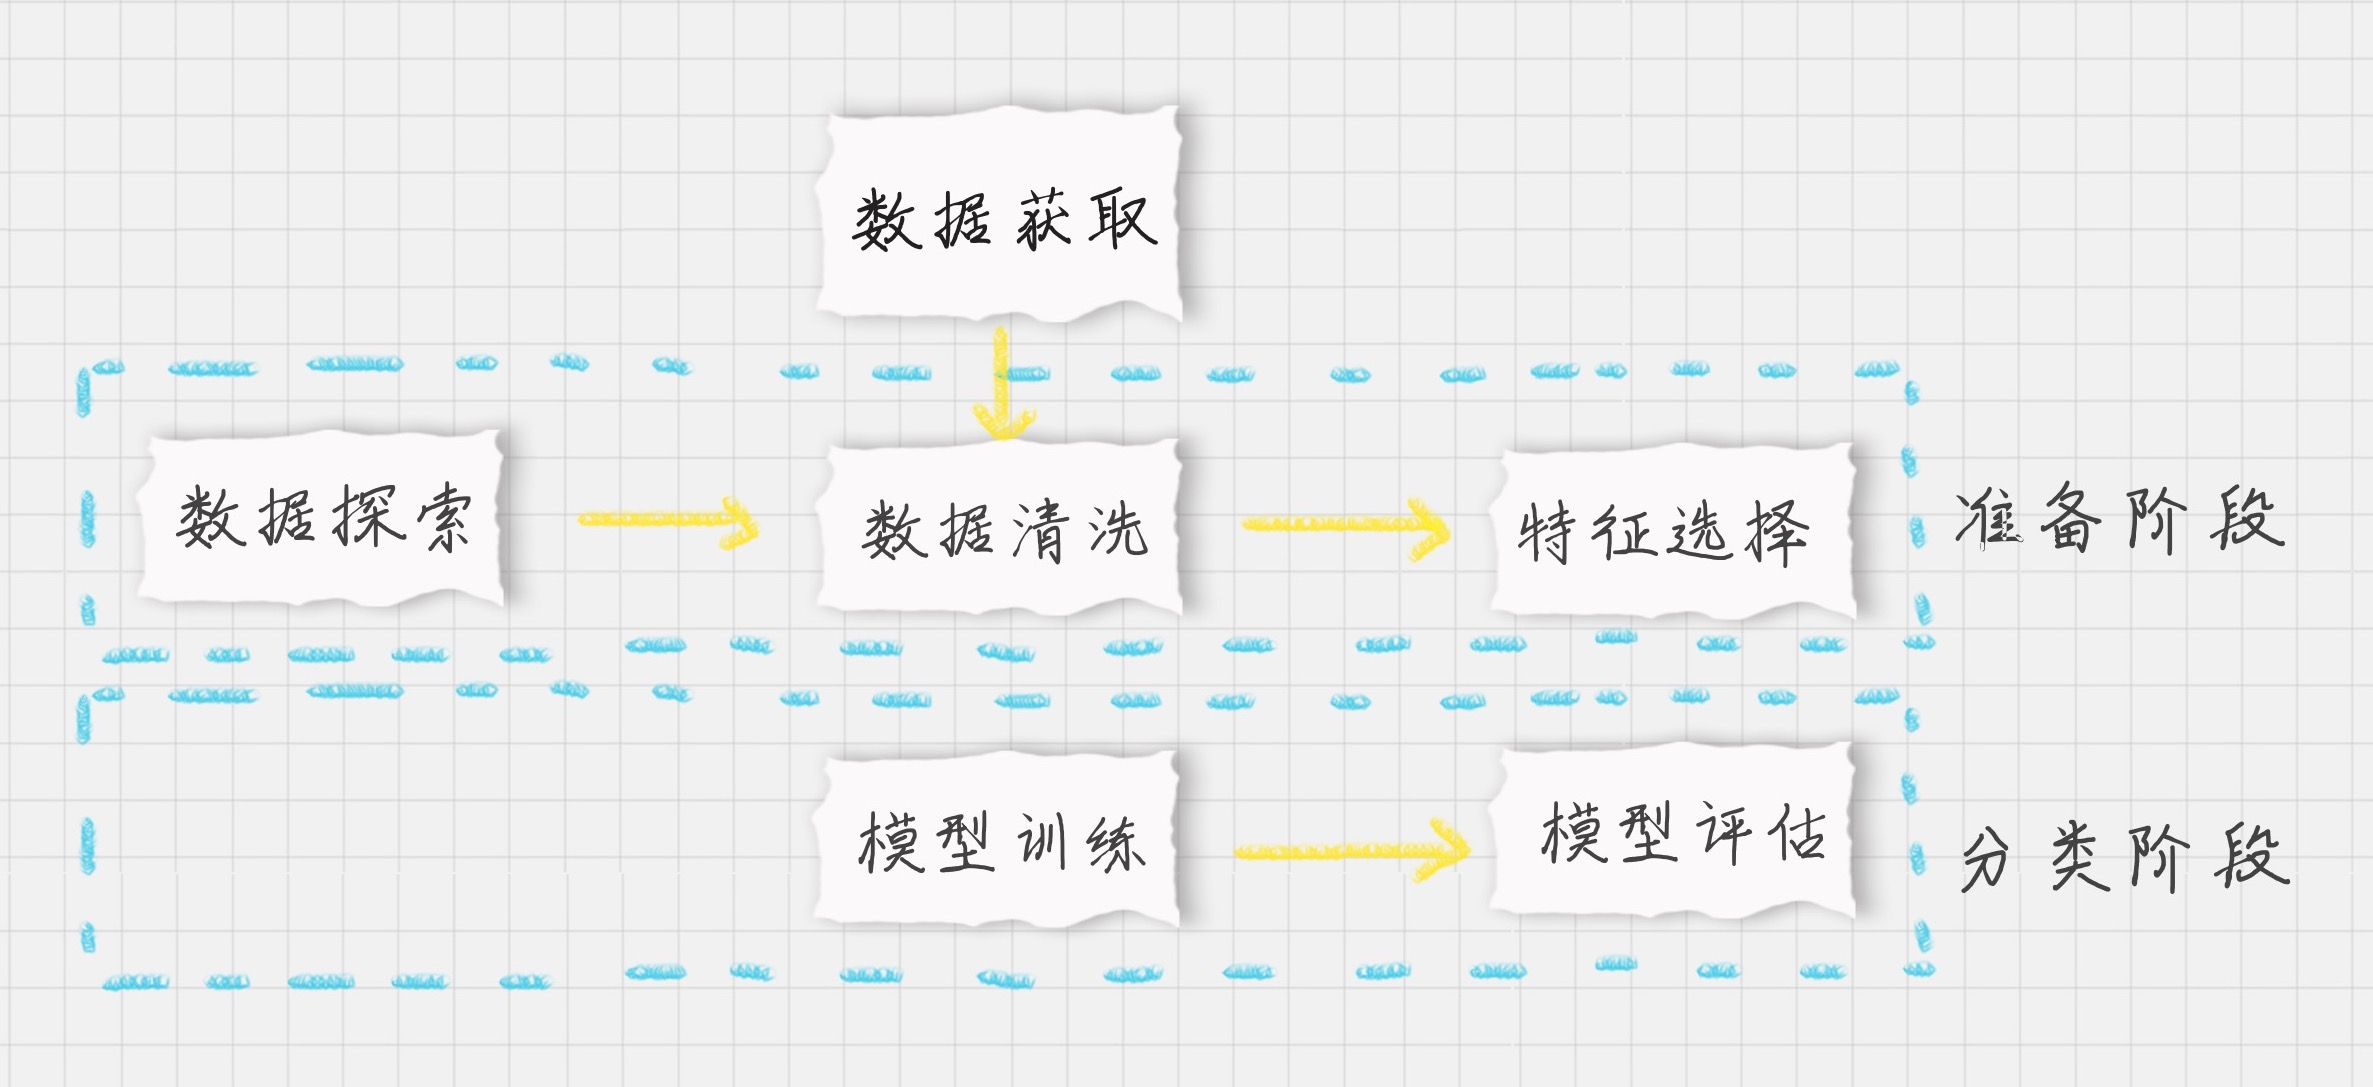

整个训练过程基本上都会包括三个阶段：

* 1、数据加载：我们可以直接从 sklearn 中加载自带的手写数字数据集；
* 2、准备阶段：在这个阶段中，我们需要对数据集有个初步的了解，比如样本的个数、图像长什么样、识别结果是怎样的。你可以通过可视化的方式来查看图像的呈现。通过数据规范化可以让数据都在同一个数量级的维度。另外，因为训练集是图像，每幅图像是个 8*8 的矩阵，我们不需要对它进行特征选择，将全部的图像数据作为特征值矩阵即可；
* 3、分类阶段：通过训练可以得到分类器，然后用测试集进行准确率的计算。好了，按照上面的步骤，我们一起来实现下这个项目。

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


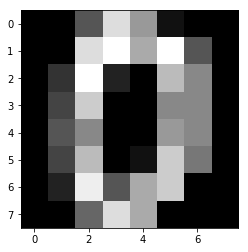

In [2]:
# 首先是加载数据和对数据的探索：
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

我们对原始数据集中的第一幅进行数据可视化，可以看到图像是个 8*8 的像素矩阵，上面这幅图像是一个“0”，从训练集的分类标注中我们也可以看到分类标注为“0”。

sklearn 自带的手写数字数据集一共包括了 1797 个样本，每幅图像都是 8*8 像素的矩阵。因为并没有专门的测试集，所以我们需要对数据集做划分，划分成训练集和测试集。因为 KNN 算法和距离定义相关，我们需要对数据进行规范化处理，采用 Z-Score 规范化，代码如下：

In [3]:
# 分割数据，将25%的数据作为测试集，其余作为训练集（你也可以指定其他比例的数据作为训练集）
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

然后我们构造一个 KNN 分类器 knn，把训练集的数据传入构造好的 knn，并通过测试集进行结果预测，与测试集的结果进行对比，得到 KNN 分类器准确率，代码如下：

In [ ]:
# 创建KNN分类器
knn = KNeighborsClassifier() 
knn.fit(train_ss_x, train_y) 
predict_y = knn.predict(test_ss_x) 
print("KNN准确率: %.4lf" % accuracy_score(test_y, predict_y))

好了，这样我们就构造好了一个 KNN 分类器。之前我们还讲过 SVM、朴素贝叶斯和决策树分类。我们用手写数字数据集一起来训练下这些分类器，然后对比下哪个分类器的效果更好。代码如下：

In [ ]:
# 创建SVM分类器
svm = SVC()
svm.fit(train_ss_x, train_y)
predict_y=svm.predict(test_ss_x)
print('SVM准确率: %0.4lf' % accuracy_score(test_y, predict_y))
# 采用Min-Max规范化
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)
# 创建Naive Bayes分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y) 
predict_y = mnb.predict(test_mm_x) 
print("多项式朴素贝叶斯准确率: %.4lf" % accuracy_score(test_y, predict_y))
# 创建CART决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x, train_y) 
predict_y = dtc.predict(test_mm_x) 
print("CART决策树准确率: %.4lf" % accuracy_score(test_y, predict_y))

这里需要注意的是，我们在做多项式朴素贝叶斯分类的时候，传入的数据不能有负数。因为 Z-Score 会将数值规范化为一个标准的正态分布，即均值为 0，方差为 1，数值会包含负数。因此我们需要采用 Min-Max 规范化，将数据规范化到[0,1]范围内。

好了，我们整理下这 4 个分类器的结果：
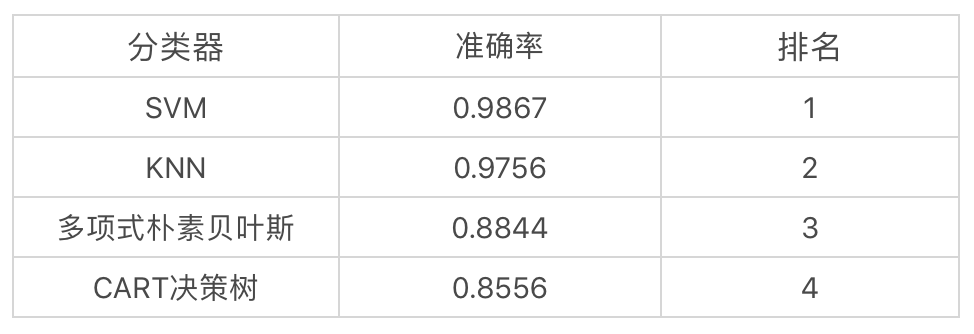

你能看出来 KNN 的准确率还是不错的，和 SVM 不相上下。

代码中，我使用了 train_test_split 做数据集的拆分，使用 matplotlib.pyplot 工具包显示图像，使用 accuracy_score 进行分类器准确率的计算，使用 preprocessing 中的 StandardScaler 和 MinMaxScaler 做数据的规范化。

**总结**

今天我带你一起做了手写数字分类识别的实战，分别用 KNN、SVM、朴素贝叶斯和决策树做分类器，并统计了四个分类器的准确率。在这个过程中你应该对数据探索、数据可视化、数据规范化、模型训练和结果评估的使用过程有了一定的体会。在数据量不大的情况下，使用 sklearn 还是方便的。

如果数据量很大，比如 MNIST 数据集中的 6 万个训练数据和 1 万个测试数据，那么采用深度学习 +GPU 运算的方式会更适合。因为深度学习的特点就是需要大量并行的重复计算，GPU 最擅长的就是做大量的并行计算。

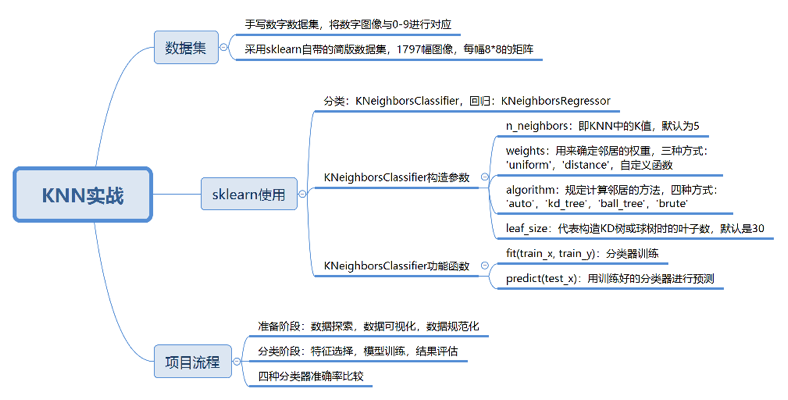

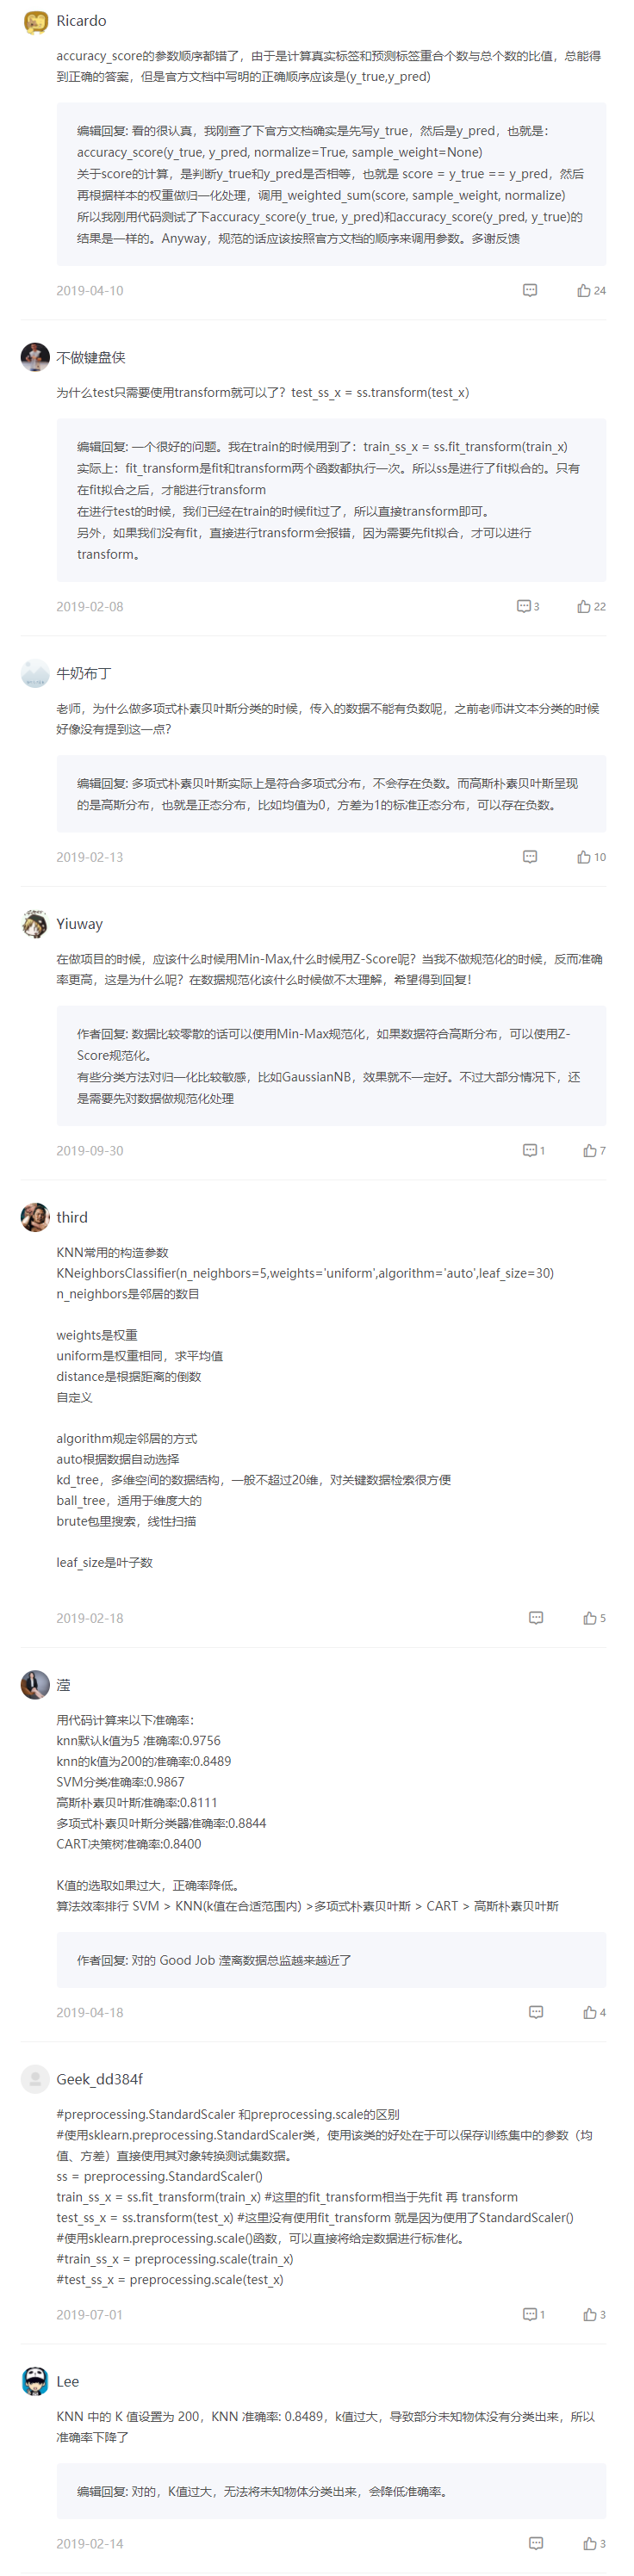